## House Price Prediction Regression Project 

## Project Goals

## Load Module/Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from pandas.api.types import CategoricalDtype

from sklearn.preprocessing import StandardScaler

## Load Datasets

In [3]:
#train_data_path=r"C:\Users\Admin\Desktop\projects\house_price_prediction\data"
#test_data_path=r"C:\Users\Admin\Desktop\projects\house_price_prediction\data\test_csv"

df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

print('Shape of df_train :',df_train.shape)
print('Shape of df_test :',df_test.shape)


Shape of df_train : (1460, 81)
Shape of df_test : (1459, 80)


In [5]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


In [7]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Know your data

## Data Integration

In [11]:
df=pd.concat([df_train,df_test])

print('Shape of Integrated Data :',df.shape)

Shape of Integrated Data : (2919, 81)


In [13]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [15]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


## Get the Brief information of Dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [20]:
int_features=df.select_dtypes(include=["int64"]).columns
print("Total Number of INT Features: ",int_features.shape[0])
print("Total INT Features: ",int_features.tolist())

Total Number of INT Features:  26
Total INT Features:  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [22]:
float_features=df.select_dtypes(include=["float64"]).columns
print("Total Number of Floating Features: ",float_features.shape[0])
print("Total Floating Features: ",float_features.tolist())

Total Number of Floating Features:  12
Total Floating Features:  ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [24]:
categorical_features=df.select_dtypes(include=["object"]).columns
print("Total Number of categorical Features: ",categorical_features.shape[0])
print("Total Categorical Features: ",categorical_features.tolist())

Total Number of categorical Features:  43
Total Categorical Features:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## get the Statistical Information of Numerical values

In [27]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [29]:
df.describe().shape

(8, 38)

## Handling Missing Values

## Visuallise Null/Missing Values

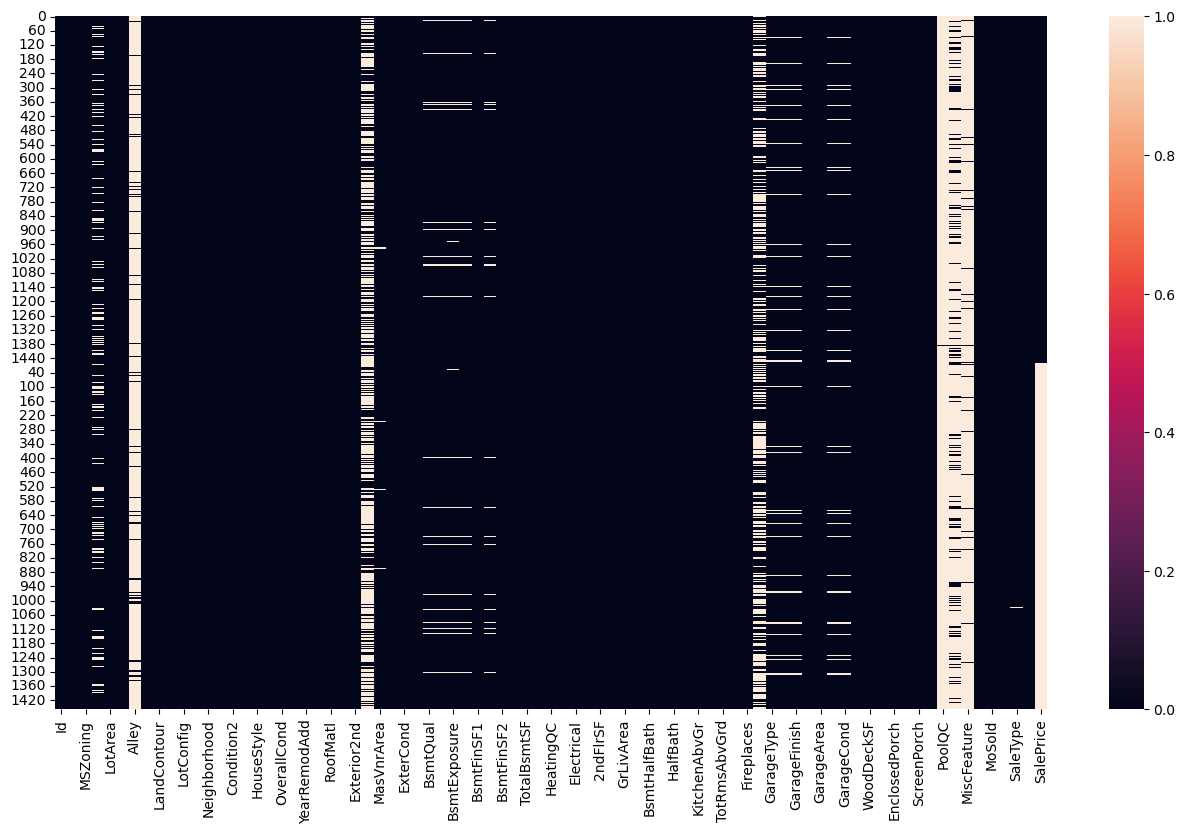

In [33]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("EDA_img/heatmap_DF_of_null_values.png")

## Get the Null value Percentage of every Feature

In [36]:
#set index as ID Column
df=df.set_index("Id")

In [38]:
null_count=df.isnull().sum()
null_count

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [40]:
null_percent=df.isnull().sum()/df.shape[0]*100
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

## Drop Column/features
As Per observation we will not drop any features from datasets

In [43]:
#As per Our Domain Knowledge we will not drop null values istead we add constant values NA.
miss_value_50_perc=null_percent[null_percent>50]
miss_value_50_perc

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [45]:
#As per Our Domain Knowledge we will not drop  FireplceQ null values istead we add constant values NA.
miss_value_20_50_perc=null_percent[(null_percent > 20) & (null_percent < 51)]
miss_value_20_50_perc

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [47]:
miss_value_20_50_perc=null_percent[(null_percent > 5) & (null_percent < 21)]
miss_value_20_50_perc

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

In [49]:
df['LotFrontage'].value_counts().head()

LotFrontage
60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: count, dtype: int64

<Axes: ylabel='Id'>

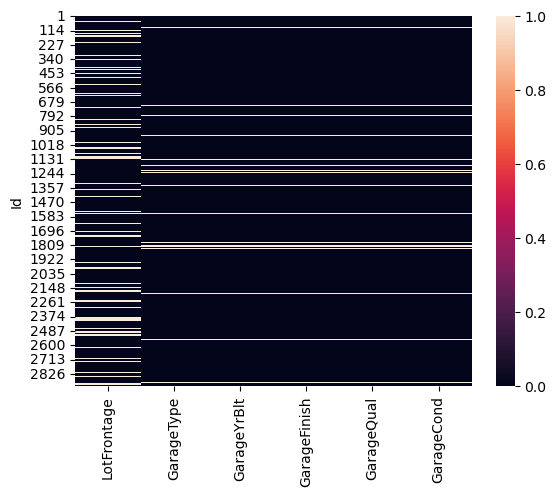

In [51]:
sns.heatmap(df[miss_value_20_50_perc.keys()].isnull())

## Missing Value Imputation

In [54]:
missing_value_feat=null_percent[null_percent>0]
print('Total Missing Value feature: ',len(missing_value_feat))
missing_value_feat

Total Missing Value feature:  35


MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [56]:
cat_na_feat=missing_value_feat[missing_value_feat.keys().isin(categorical_features)]
print('Total number of category missing features: ',len(cat_na_feat))
cat_na_feat

Total number of category missing features:  23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [58]:
int_na_feat=missing_value_feat[missing_value_feat.keys().isin(int_features)]
print('Total number of Integer missing features: ',len(int_na_feat))
int_na_feat

Total number of Integer missing features:  0


Series([], dtype: float64)

In [60]:
float_na_feat=missing_value_feat[missing_value_feat.keys().isin(float_features)]
print('Total number of Float missing features: ',len(float_na_feat))
float_na_feat

Total number of Float missing features:  12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

### Handling MSZoning = 0.137033

In [63]:
df['MSZoning'].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

<Axes: xlabel='MSZoning', ylabel='count'>

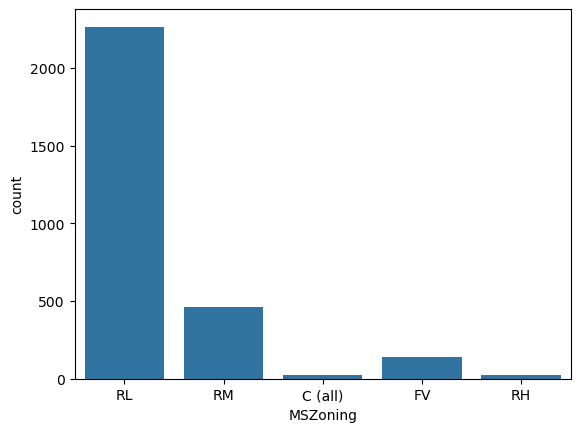

In [65]:
sns.countplot(data=df,x='MSZoning')

In [67]:
## Backup of original data
df_mvi=df.copy()
df_mvi.shape

(2919, 80)

In [69]:
mszoning_mode=df['MSZoning'].mode()[0]
df_mvi['MSZoning'].replace(np.nan,mszoning_mode,inplace=True)
df_mvi['MSZoning'].isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\4239207054.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['MSZoning'].replace(np.nan,mszoning_mode,inplace=True)


0

In [71]:
def oldNewCountPlot(df,df_new,features):
    plt.subplot(121)
    sns.countplot(data=df,x=features)
    plt.title('Old Distribution')
    plt.subplot(122)
    sns.countplot(data=df_new,x=features)
    plt.title('New Distribution')
    
    

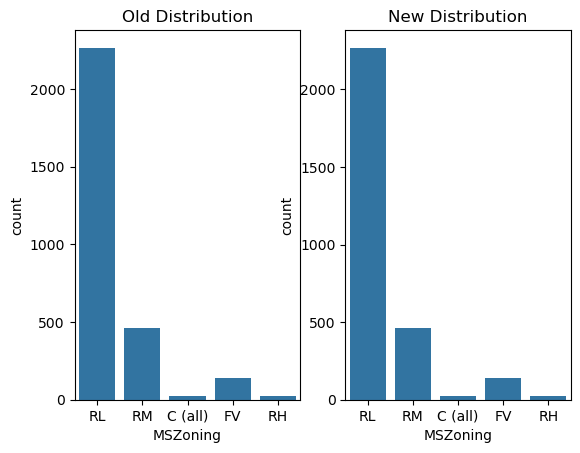

In [73]:
oldNewCountPlot(df,df_mvi,'MSZoning')

## Handling Alley=93.216855

In [76]:
df_mvi['Alley'].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [78]:
alley_cont='NA'
df_mvi['Alley'].replace(np.nan,alley_cont,inplace=True)
df_mvi['Alley'].isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\376169323.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Alley'].replace(np.nan,alley_cont,inplace=True)


0

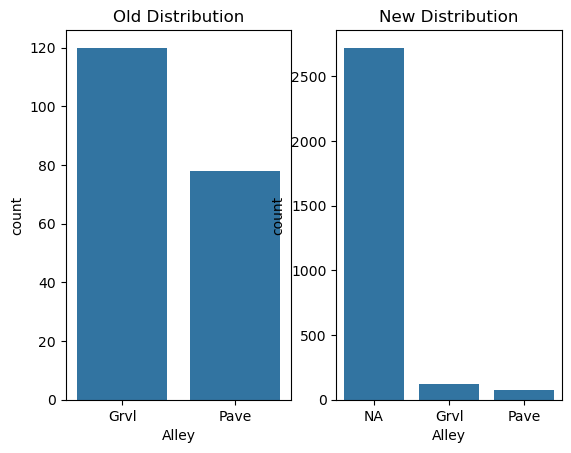

In [80]:
oldNewCountPlot(df,df_mvi,'Alley')

## Handling LotFrontage=16.649538

In [83]:
def boxDistPlot(df,figsize=(16,5)):
    plt.figure(figsize=figsize)
    plt.subplot(121)
    sns.boxplot(df)
    plt.subplot(122)
    sns.distplot(df)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\581165891.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


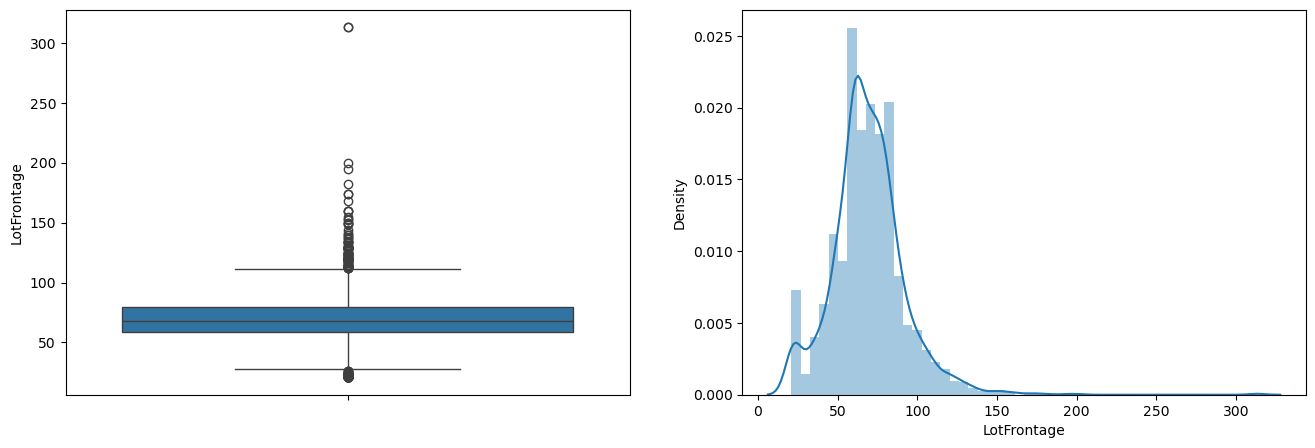

In [85]:
boxDistPlot(df["LotFrontage"])

In [86]:
lotfrontage_mean=df["LotFrontage"].mean()
df_mvi["LotFrontage"].replace(np.nan,lotfrontage_mean,inplace=True)
df_mvi["LotFrontage"].isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\843615853.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["LotFrontage"].replace(np.nan,lotfrontage_mean,inplace=True)


0

In [89]:
def oldNewBoxDisPlot(df,df_new,features,figsize=(16,10)):
    plt.figure(figsize=figsize)
    plt.subplot(221)
    sns.boxplot(data=df,x=features)
    plt.title('Old Distribution')
    plt.subplot(222)
    sns.distplot(df[features])
    plt.title('Old Distribution')
    
    plt.subplot(223)
    sns.boxplot(data=df_new,x=features)
    plt.title('New Distribution')
    plt.subplot(224)
    sns.distplot(df_new[features])
    plt.title('New Distribution')

C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\1920917297.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])
C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\1920917297.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[features])


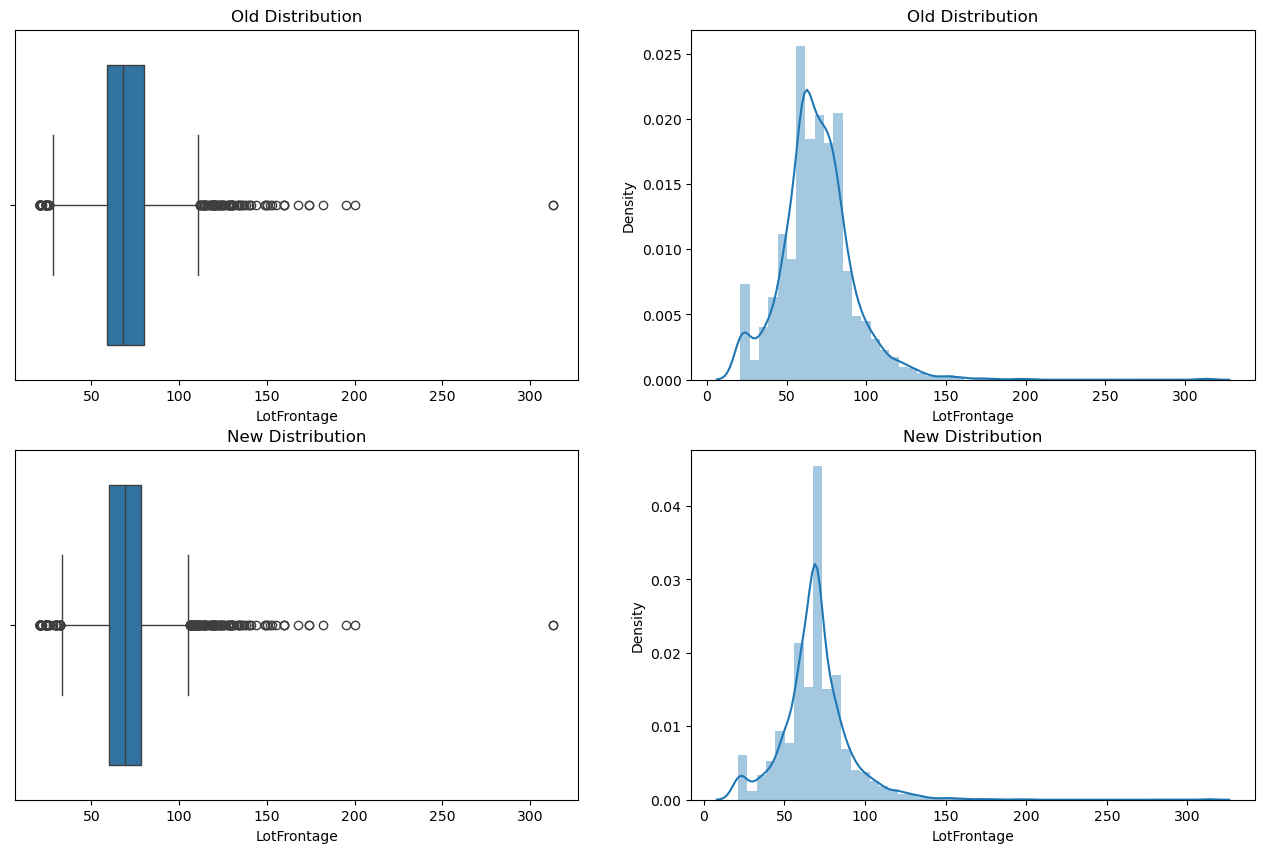

In [91]:
oldNewBoxDisPlot(df,df_mvi,"LotFrontage")

### Handling Utilities=0.068517

In [93]:
utilities_mode=df["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan,utilities_mode,inplace=True)
df_mvi["Utilities"].isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\1164756389.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Utilities"].replace(np.nan,utilities_mode,inplace=True)


0

### Handling Exterior1st=0.034258 Exterior2nd=0.034258

In [97]:
df['Exterior1st'].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [99]:
df['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [101]:
exterior1st_mode=df["Exterior1st"].mode()[0]
exterior2nd_mode=df["Exterior2nd"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan,exterior1st_mode,inplace=True)
df_mvi["Exterior2nd"].replace(np.nan,exterior2nd_mode,inplace=True)
print("E1st is null: ",df_mvi["Exterior1st"].isnull().sum())
print("E2nd is null: ",df_mvi["Exterior2nd"].isnull().sum())

E1st is null:  0
E2nd is null:  0


C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\1891654187.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi["Exterior1st"].replace(np.nan,exterior1st_mode,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\1891654187.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

### Handling MasVnrType=60.500171 MasVnrArea=0.787941

<Axes: ylabel='Id'>

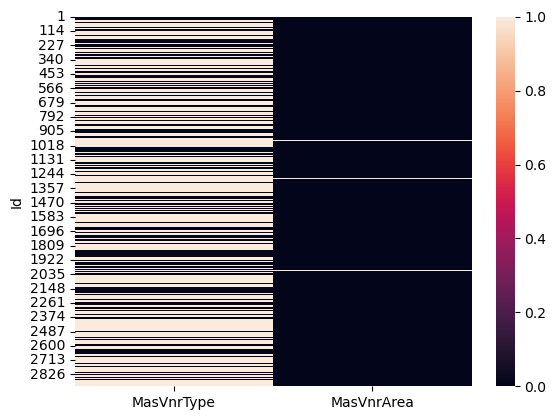

In [104]:
sns.heatmap(df[['MasVnrType','MasVnrArea']].isnull())

In [105]:
df['MasVnrType'].value_counts()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [108]:
df[df[['MasVnrType','MasVnrArea']].isnull().any(axis=1)].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,952.0,952.0,GasA,Gd,Y,FuseF,1022,752,0,1774,0.0,0.0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2.0,468.0,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851.0,Unf,0.0,140.0,991.0,GasA,Ex,Y,SBrkr,1077,0,0,1077,1.0,0.0,1,0,2,2,TA,5,Typ,2,TA,Attchd,1939.0,RFn,1.0,205.0,Gd,TA,Y,0,4,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


In [110]:
masvnrtype='None'
df_mvi['MasVnrType'].replace(np.nan,masvnrtype,inplace=True)
df_mvi['MasVnrType'].isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\819461983.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['MasVnrType'].replace(np.nan,masvnrtype,inplace=True)


0

In [112]:
masvnrarea_mode=0
df_mvi['MasVnrArea'].replace(np.nan,masvnrarea_mode,inplace=True)
df_mvi['MasVnrArea'].isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\349595311.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['MasVnrArea'].replace(np.nan,masvnrarea_mode,inplace=True)


0

### Handling Basement Feature

In [115]:
cat_bsmt_feat=["BsmtQual",
"BsmtCond",
"BsmtExposure", 
"BsmtFinType1",  
"BsmtFinType2"]    

float_bsmt_feat=["BsmtFinSF1",       
"BsmtFinSF2",      
"BsmtUnfSF",        
"TotalBsmtSF",     
"BsmtFullBath",     
"BsmtHalfBath"]     

<Axes: ylabel='Id'>

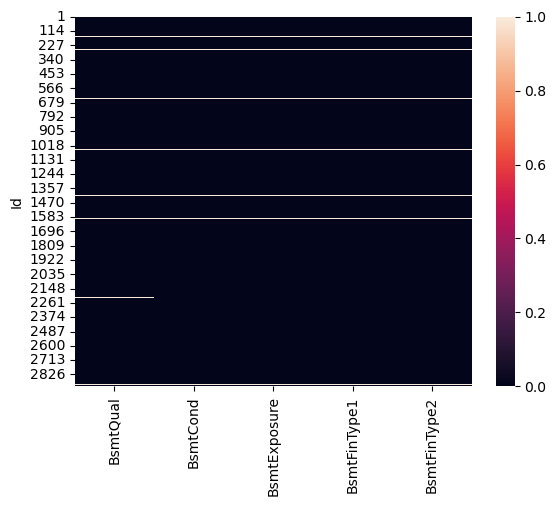

In [117]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [118]:
for feat in cat_bsmt_feat:
    print(f'Value Count For {feat}:{df[feat].value_counts()}')
    

Value Count For BsmtQual:BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
Value Count For BsmtCond:BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
Value Count For BsmtExposure:BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
Value Count For BsmtFinType1:BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
Value Count For BsmtFinType2:BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64


In [121]:
bsmt_const="NA"
for feat in cat_bsmt_feat:
    df_mvi[feat].replace(np.nan,bsmt_const,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\3554272331.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,bsmt_const,inplace=True)


In [123]:
df_mvi[cat_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

<Axes: ylabel='Id'>

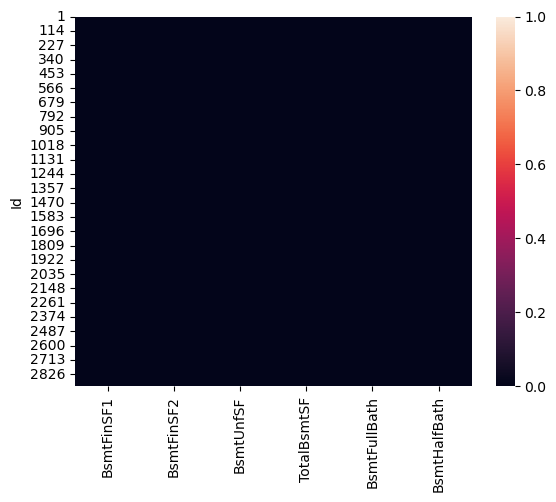

In [125]:
sns.heatmap(df[float_bsmt_feat].isnull())

In [127]:
df_bsmt=df[cat_bsmt_feat+float_bsmt_feat]
df_bsmt[df_bsmt.isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
260,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
333,Gd,TA,No,GLQ,NaN,1124.0,479.0,1603.0,3206.0,1.0,0.0
343,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:
bsmt_num= 0
for feat in float_bsmt_feat:
    df_mvi[feat].replace(np.nan,bsmt_num,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\3669945854.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,bsmt_num,inplace=True)


In [131]:
df_mvi[cat_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

### Handling Electrical = 0.034258 KitchenQual= 0.034258

In [134]:
df['Electrical'].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [136]:
df['KitchenQual'].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [138]:
df_ekk=df[['Electrical','KitchenQual','KitchenAbvGr']]
df_ekk[df_ekk.isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
Id,,,
1380,NaN,Gd,1
1556,SBrkr,NaN,1


In [140]:
electrical=df['Electrical'].mode()[0]
df_mvi['Electrical'].replace(np.nan,electrical,inplace=True)
df_mvi['Electrical'].isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\793978456.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Electrical'].replace(np.nan,electrical,inplace=True)


0

In [142]:
kitchenqual=df['KitchenQual'].mode()[0]
df_mvi['KitchenQual'].replace(np.nan,kitchenqual,inplace=True)
df_mvi['KitchenQual'].isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\3733448188.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['KitchenQual'].replace(np.nan,kitchenqual,inplace=True)


0

### Missing Value Functional =  0.068517

In [145]:
df['Functional'].value_counts()

Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [147]:
functional=df['Functional'].mode()[0]
df_mvi['Functional'].replace(np.nan,functional,inplace=True)
df_mvi['Functional'].isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\2411880166.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Functional'].replace(np.nan,functional,inplace=True)


0

### Handling FireplaceQu =48.646797

In [150]:
df['FireplaceQu'].value_counts()

FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64

In [152]:
fireplacequ="NA"
df_mvi['FireplaceQu'].replace(np.nan,fireplacequ,inplace=True)
df_mvi['FireplaceQu'].isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\1080554713.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['FireplaceQu'].replace(np.nan,fireplacequ,inplace=True)


0

### Handling Garage Features

In [155]:
cat_garage_feat=[
'GarageType',
'GarageFinish',     
'GarageQual',      
'GarageCond'
]
num_garage_feat=[
'GarageYrBlt' ,
'GarageCars',  
'GarageArea'  ]

<Axes: ylabel='Id'>

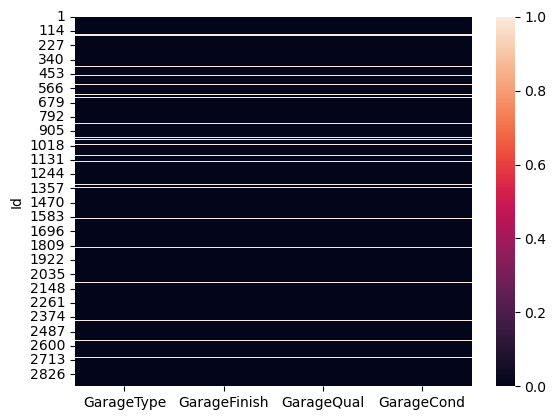

In [157]:
sns.heatmap(df[cat_garage_feat].isnull())

In [159]:
garg_const="NA"
for feat in cat_garage_feat:
    df_mvi[feat].replace(np.nan,garg_const,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\2121267153.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,garg_const,inplace=True)


In [161]:
 df_mvi[cat_garage_feat].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

<Axes: ylabel='Id'>

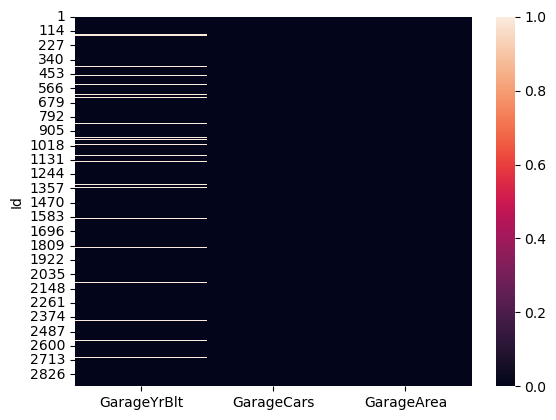

In [163]:
sns.heatmap(df[num_garage_feat].isnull())

In [165]:
df_garg=df[num_garage_feat+cat_garage_feat]
df_garg[df_garg.isnull().any(axis=1)]

,GarageYrBlt,GarageCars,GarageArea,GarageType,GarageFinish,GarageQual,GarageCond
Id,,,,,,,
40,NaN,0.0,0.0,NaN,NaN,NaN,NaN
49,NaN,0.0,0.0,NaN,NaN,NaN,NaN
79,NaN,0.0,0.0,NaN,NaN,NaN,NaN
89,NaN,0.0,0.0,NaN,NaN,NaN,NaN
90,NaN,0.0,0.0,NaN,NaN,NaN,NaN
100,NaN,0.0,0.0,NaN,NaN,NaN,NaN
109,NaN,0.0,0.0,NaN,NaN,NaN,NaN
126,NaN,0.0,0.0,NaN,NaN,NaN,NaN
128,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [167]:
garg_num=0
for feat in num_garage_feat:
    df_mvi[feat].replace(np.nan,garg_num,inplace=True)
df_mvi[num_garage_feat].isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\3291006919.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,garg_num,inplace=True)


GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

### Handling Reamining feature

PoolQC          99.657417  NA
Fence           80.438506  NA	
MiscFeature     96.402878  NA	  
SaleType         0.034258  Mode

In [171]:
other_feat=['PoolQC','Fence','MiscFeature','SaleType']
for feat in other_feat:
    print(f'Value Count For {feat}:{df[feat].value_counts()}')

Value Count For PoolQC:PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
Value Count For Fence:Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
Value Count For MiscFeature:MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64
Value Count For SaleType:SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64


In [173]:
ex_saletype=['PoolQC','Fence','MiscFeature']
other_const="NA"
for feat in ex_saletype:
    df_mvi[feat].replace(np.nan,other_const,inplace=True)
df_mvi[ex_saletype].isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\3866884216.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan,other_const,inplace=True)


PoolQC         0
Fence          0
MiscFeature    0
dtype: int64

In [175]:
df_mvi['SaleType']=df['SaleType']

In [177]:
df_mvi['SaleType'].isnull().sum()

1

In [179]:
saletype_mode=df['SaleType'].mode()[0]
df_mvi['SaleType'].replace(np.nan,saletype_mode,inplace=True)
df_mvi['SaleType'].isnull().sum()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1364\1776182597.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['SaleType'].replace(np.nan,saletype_mode,inplace=True)


0

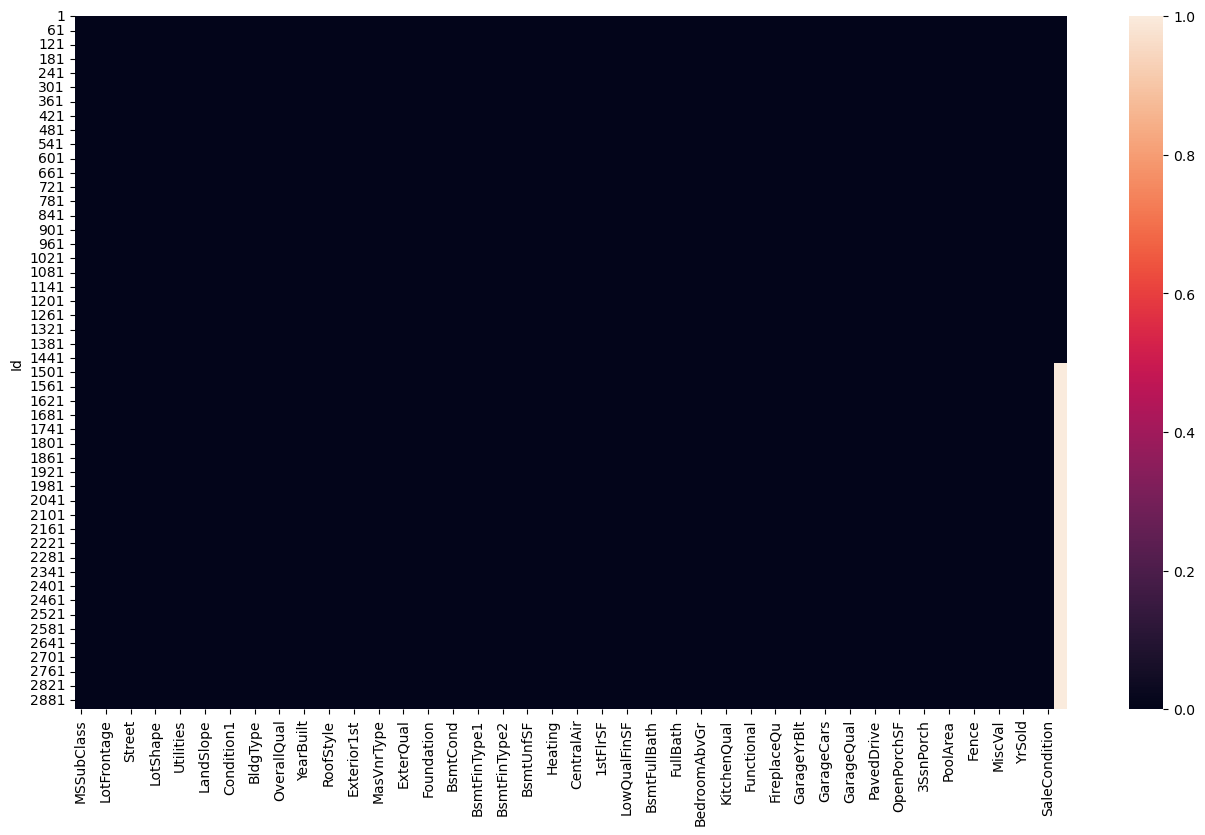

In [181]:
plt.figure(figsize=(16,9))
sns.heatmap(df_mvi.isnull())
plt.savefig("EDA_img/heatmap_DF_after_handling_missing_values.png")

In [182]:
df_mvi.isnull().any(axis=1).sum()

1459

## Feature Transformation
### Converting Numerical to Categorical Features

In [184]:
for_num_conv=["MSSubClass","YearBuilt",
"YearRemodAdd",
"MoSold",
"YrSold", 
"GarageYrBlt"]
for feat in for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = int64
YearBuilt: data type = int64
YearRemodAdd: data type = int64
MoSold: data type = int64
YrSold: data type = int64
GarageYrBlt: data type = float64


In [185]:
df_mvi[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,MoSold,YrSold,GarageYrBlt
Id,,,,,,
1,60,2003,2003,2,2008,2003.0
2,20,1976,1976,5,2007,1976.0
3,60,2001,2002,9,2008,2001.0
4,70,1915,1970,2,2006,1998.0
5,60,2000,2000,12,2008,2000.0


In [190]:
df_mvi['MoSold'].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [191]:
calendar.month_abbr[3]

'Mar'

In [193]:
df_mvi['MoSold']=df_mvi['MoSold'].apply(lambda x: calendar.month_abbr[x] )

In [196]:
df_mvi['MoSold'].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [198]:
for feat in for_num_conv:
    df_mvi[feat]=df_mvi[feat].astype(str)

In [200]:
for feat in for_num_conv:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = object
YearBuilt: data type = object
YearRemodAdd: data type = object
MoSold: data type = object
YrSold: data type = object
GarageYrBlt: data type = object


## Convert Categorical Feature To Numerical
### Ordinal Encoding

In [203]:
ordinal_enc_var=[
"ExterQual",
"ExterCond",
"BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinType2",
"HeatingQC",
"KitchenQual",
"FireplaceQu",
"GarageQual",
"GarageCond",
"PoolQC",
"PavedDrive",
"Utilities",
"GarageFinish",
"BsmtFinSF1",
"Functional"]

In [205]:
print("Total number of feat to convert ordinal to numerical format :", len(ordinal_enc_var))

Total number of feat to convert ordinal to numerical format : 18


In [207]:
df['ExterQual'].value_counts()

ExterQual
TA    1798
Gd     979
Ex     107
Fa      35
Name: count, dtype: int64

In [209]:
df_mvi['ExterQual']=df_mvi['ExterQual'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes

In [211]:
df_mvi['ExterQual'].value_counts()

ExterQual
2    1798
3     979
4     107
1      35
Name: count, dtype: int64

In [213]:
df_mvi['BsmtExposure'].value_counts()

BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
NA      82
Name: count, dtype: int64

In [215]:
df_mvi['BsmtExposure']=df_mvi['BsmtExposure'].astype(CategoricalDtype(categories=['NA','No','Mn','Av','Gd'],ordered=True)).cat.codes

In [217]:
df_mvi['BsmtExposure'].value_counts()

BsmtExposure
1    1904
3     418
4     276
2     239
0      82
Name: count, dtype: int64

In [219]:
df_mvi['ExterCond']=df_mvi['ExterCond'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_mvi['BsmtQual']=df_mvi['BsmtQual'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_mvi['BsmtCond']=df_mvi['BsmtCond'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_mvi['BsmtFinType1']=df_mvi['BsmtFinType1'].astype(CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True)).cat.codes
df_mvi['BsmtFinType2']=df_mvi['BsmtFinType2'].astype(CategoricalDtype(categories=['NA','Unf','LwQ','Rec','BLQ','ALQ','GLQ'],ordered=True)).cat.codes
df_mvi['HeatingQC']=df_mvi['HeatingQC'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_mvi['KitchenQual']=df_mvi['KitchenQual'].astype(CategoricalDtype(categories=['Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_mvi['FireplaceQu']=df_mvi['FireplaceQu'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_mvi['GarageQual']=df_mvi['GarageQual'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_mvi['GarageCond']=df_mvi['GarageCond'].astype(CategoricalDtype(categories=['NA','Po','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_mvi['GarageFinish']=df_mvi['GarageFinish'].astype(CategoricalDtype(categories=['NA','Unf','RFn','Fin'],ordered=True)).cat.codes
df_mvi['PoolQC']=df_mvi['PoolQC'].astype(CategoricalDtype(categories=['NA','Fa','TA','Gd','Ex'],ordered=True)).cat.codes
df_mvi['PavedDrive']=df_mvi['PavedDrive'].astype(CategoricalDtype(categories=['N','P','Y'],ordered=True)).cat.codes
df_mvi['Utilities']=df_mvi['Utilities'].astype(CategoricalDtype(categories=['ELO','NoSeWa','NoSewr','AllPub'],ordered=True)).cat.codes
df_mvi['Functional']=df_mvi['Functional'].astype(CategoricalDtype(categories=['Sal','Sev','Maj2','Maj1','Mod','Min2','Min1','Typ'],ordered=True)).cat.codes

In [221]:
for feat in ordinal_enc_var:
    print(f"{feat}: data type = {df_mvi[feat].dtype}")

ExterQual: data type = int8
ExterCond: data type = int8
BsmtQual: data type = int8
BsmtCond: data type = int8
BsmtExposure: data type = int8
BsmtFinType1: data type = int8
BsmtFinType2: data type = int8
HeatingQC: data type = int8
KitchenQual: data type = int8
FireplaceQu: data type = int8
GarageQual: data type = int8
GarageCond: data type = int8
PoolQC: data type = int8
PavedDrive: data type = int8
Utilities: data type = int8
GarageFinish: data type = int8
BsmtFinSF1: data type = float64
Functional: data type = int8


In [223]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

### One Hot Encoding for Nominal categorical data

In [226]:
df_enc=df_mvi.copy()

object_feature=df_enc.select_dtypes(include='object').columns.tolist()

print('Total number of Objects: ',len(object_feature))
print('features \n',object_feature)

Total number of Objects:  32
features 
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [228]:
print('Shape of the DF before Encoding: ',df_enc.shape)

Shape of the DF before Encoding:  (2919, 80)


In [230]:
pd.get_dummies(df_enc['MSZoning'],columns='MSZoning',prefix='MSZoning',dtype=int).head(2)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
Id,,,,,
1,0,0,0,1,0
2,0,0,0,1,0


In [232]:
df_enc=pd.get_dummies(df_enc,columns=object_feature,prefix=object_feature,dtype=int,drop_first=True)

In [234]:
print('Shape of the DF After Encoding: ',df_enc.shape)

Shape of the DF After Encoding:  (2919, 513)


In [236]:
df_enc.select_dtypes(include='object').columns.tolist()

[]

## Split data for Training and Testing

In [239]:
df_enc.shape

(2919, 513)

In [241]:
len_train=df_train.shape[0]

In [243]:
X_train = df_enc[ :len_train].drop('SalePrice',axis=1)
y_train=df_enc['SalePrice'][ :len_train]
X_test=df_enc[len_train:].drop('SalePrice',axis=1)

print("Shape of X_train data : ",X_train.shape)
print("Shape of y_train data : ",y_train.shape)
print("Shape of X_test data : ",X_test.shape)

Shape of X_train data :  (1460, 512)
Shape of y_train data :  (1460,)
Shape of X_test data :  (1459, 512)


## Feature Scaling

In [246]:
sc=StandardScaler()
sc.fit(X_train)
# formula z=(x-u)/s
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [248]:
X_train[:3,:]

array([[-0.22335706, -0.20714171,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.45789401, -0.09188637,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08710685,  0.07347998,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [250]:
###Carry forward for deployment

#sc.mean_
#sc.with_std
#sc.scale_
#sc.n_samples_seen_
#sc.n_features_in_
#sc.with_mean
#sc.var_

## Train ML Model

In [253]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [254]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.isotonic import IsotonicRegression

In [269]:
svr=SVR()
lr=LinearRegression()
sgdr=SGDRegressor()
knr=KNeighborsRegressor()
gpr=GaussianProcessRegressor()
dtr=DecisionTreeRegressor()
gbr=GradientBoostingRegressor()
rfr=RandomForestRegressor()
mlpr=MLPRegressor()
xgbr=XGBRegressor()
ir=IsotonicRegression()

In [271]:
models={"k":['SVR',svr],
        "a":["LinearRegression",lr],
        "b":["SGDRegressor",sgdr],
        "c":["KNeighborsRegressor",knr],
        "d":["GaussianProcessRegressor",gpr],
        "e":["DecisionTreeRegressor",dtr],
        "f":["GradientBoostingRegressor",gbr],
        "g":["RandomForestRegressor",rfr],
        "h":["MLPRegressor",mlpr],
        "i":["XGBRegressor",xgbr],
        "j":["IsotonicRegression",ir]   
       }

In [273]:
#validation
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import make_scorer,r2_score

def test_model(model,X_train=X_train,y_train=y_train):
    cv=KFold(n_splits=7,shuffle=True,random_state=45)
    r2=make_scorer(r2_score)
    r2_val_score=cross_val_score(model,X_train,y_train,cv=cv,scoring=r2)
    score=[r2_val_score.mean()]
    return score

In [263]:
model_score=[]
for model in models:
    print('Training Model: ',models[model][0])
    score=test_model(models[model][1],X_train,y_train)
    print('Score of Model: ',score)
    model_score.append([models[model][0],score[0]])

Training Model:  SVR
Score of Model:  [-0.052133548352104216]
Training Model:  LinearRegression
Score of Model:  [-2.683819929847711e+25]
Training Model:  SGDRegressor
Score of Model:  [-2900.8598654260563]
Training Model:  KNeighborsRegressor
Score of Model:  [0.5585925623107102]
Training Model:  GaussianProcessRegressor
Score of Model:  [-5.398916312612151]
Training Model:  DecisionTreeRegressor
Score of Model:  [0.6918034695746228]
Training Model:  GradientBoostingRegressor
Score of Model:  [0.86735499211364]
Training Model:  RandomForestRegressor
Score of Model:  [0.8418530177807746]
Training Model:  MLPRegressor


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

Score of Model:  [-4.824975353303166]
Training Model:  XGBRegressor
Score of Model:  [0.8582487612757063]
Training Model:  IsotonicRegression


ValueError: 
All the 7 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\isotonic.py", line 387, in fit
    X, y = self._build_y(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\isotonic.py", line 302, in _build_y
    self._check_input_data_shape(X)
  File "C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\isotonic.py", line 286, in _check_input_data_shape
    raise ValueError(msg)
ValueError: Isotonic regression input X should be a 1d array or 2d array with 1 feature


In [265]:
model_score

[['SVR', -0.052133548352104216],
 ['LinearRegression', -2.683819929847711e+25],
 ['SGDRegressor', -2900.8598654260563],
 ['KNeighborsRegressor', 0.5585925623107102],
 ['GaussianProcessRegressor', -5.398916312612151],
 ['DecisionTreeRegressor', 0.6918034695746228],
 ['GradientBoostingRegressor', 0.86735499211364],
 ['RandomForestRegressor', 0.8418530177807746],
 ['MLPRegressor', -4.824975353303166],
 ['XGBRegressor', 0.8582487612757063]]

#### XGBoost parameter tuning

In [277]:
import xgboost
xgb2_reg=xgboost.XGBRegressor(n_estimators= 899,
 mon_child_weight= 2,
 max_depth= 4,
 learning_rate= 0.05,
 booster= 'gbtree')

test_model(xgb2_reg)

C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:21:09] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mon_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:21:10] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mon_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:21:11] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mon_child_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [02:21:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "mon_child_weight" } are not used.

  bst.update(dtrain,

[0.8686683435535892]

### RandomForestRegressor Paramaeter Tuning

In [282]:
from sklearn.ensemble import RandomForestRegressor

rf2_reg = RandomForestRegressor(
    n_estimators=300,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42
)

test_model(rf2_reg)


[0.8329144303829722]

### GradientBoostingRegressor Parameter Tuning

In [284]:
from sklearn.ensemble import GradientBoostingRegressor

gbr2_reg = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    subsample=0.9,
    random_state=42
)

test_model(gbr2_reg)


[0.8714730992690506]

In [298]:
# Train on log-transformed y
gbr2_reg.fit(X_train, np.log(y_train))

# Predict in log scale, then transform back
y_pred_log = gbr2_reg.predict(X_test)
y_pred = np.exp(y_pred_log).round(2)


In [310]:
y_pred

array([121408.04, 164688.45, 186067.29, ..., 161589.49, 105097.05,
       218992.32])

In [324]:
y_pred_gbr2_reg = np.exp(gbr2_reg.predict(X_test)).round(2)
gbr2_reg_solution = pd.concat([df_test['Id'], pd.DataFrame(y_pred)], axis=1)
gbr2_reg_solution.columns=['Id', 'SalePrice']
gbr2_reg_solution.to_csv('sample_submission.csv', index=False)

In [326]:
gbr2_reg_solution

,Id,SalePrice
0,1461,121408.04
1,1462,164688.45
2,1463,186067.29
3,1464,188202.82
4,1465,198184.76
5,1466,175129.82
6,1467,166874.77
7,1468,170159.32
8,1469,187979.08
9,1470,125192.33
